# <strong>第四次作品：CNN PART1 - Yale人臉影像辨識</strong>
學號：711233117

姓名：楊廷紳

 <font color=skyblue>作品目標</font>：

1. 建立CNN模型
- 定義一個適合的卷積神經網絡（CNN）架構，例如基本的CNN或者ResNet、VGG等。
- 使用PyTorch的`torch.nn`來建立模型，確保模型具有足夠的深度和參數來學習從Yale資料集中提取特徵。
- 利用 .pth 檔與 torch 套件進行模型保存與讀入

2. 訓練模型
- 使用Yale訓練資料集來訓練CNN模型，並設置適當的損失函數和優化器來最小化訓練過程中的損失。
- 監視模型在訓練集上的準確度和損失，確保模型正確地學習。

3. 模型評估與測試
- 使用Yale測試資料集來評估訓練好的模型，計算準確度來評估模型性能。觀察圖片標籤是否與原圖相符合，並測試模型的準確度。
 <hr>

### <h3 style="color: yellow;"> 讀取與轉換 Yale Face 數據集

本節將說明如何從 MATLAB 格式的 `.mat` 文件中讀取人臉圖像數據，並將這些數據轉換為 Python 中的 `DataFrame`，以便於進一步的數據處理和分析。

#### 數據加載

- **檔案讀取**：使用 `scipy.io.loadmat` 方法從指定路徑讀取 `.mat` 文件。
- **數據結構**：檔案中包含人臉圖像數據 (`faces`)，人臉計數 (`nfaces`)，圖像高度 (`n`)，圖像寬度 (`m`) 和 參與者數量 (`person`)。

#### 數據處理

- **圖像數據轉換**：將包含所有圖像的矩陣 (`faces`) 轉置，以使每列代表一個圖像，方便後續處理。
- **提取圖像尺寸**：從 `.mat` 文件中讀取圖像的尺寸 (`img_height` 和 `img_width`)。
- **標籤生成**：根據每個參與者的圖像數量生成對應的標籤，這些標籤可用於監督學習。

In [17]:
import numpy as np
import pandas as pd
import scipy.io
import os

# 讀取數據
df = scipy.io.loadmat('D:/shallow_ml/pictures/allFaces.mat')
# 數據轉換：將圖像數據轉為DataFrame，每列代表一個圖像
X = df['faces'].T # 轉置以匹配行列要求
# 提取每個人臉的計數並將其扁平化
face_counts = df['nfaces'].flatten()
# 從數據中提取圖像的維度和參與人數
img_height = int(df['n'])
img_width = int(df['m'])
total_persons = int(df['person'])
# 定義標籤：根據每個人臉的影像張數去重複生成標籤
face_counts = df['nfaces'][0]  # 提取每個人臉張數
y = np.repeat(np.arange(len(face_counts)), face_counts)


C:\Users\yangs\AppData\Local\Temp\ipykernel_15656\49799649.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_height = int(df['n'])
C:\Users\yangs\AppData\Local\Temp\ipykernel_15656\49799649.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_width = int(df['m'])
C:\Users\yangs\AppData\Local\Temp\ipykernel_15656\49799649.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  total_persons = int(df['person'])


### <h3 style="color: yellow;"> 數據處理與加載流程

#### 數據分割

- **分割數據**：使用 `train_test_split` 從 `sklearn.model_selection` 將數據分割為訓練集和測試集，其中30%的數據被分配為測試集。

#### 數據重塑與轉換

- **重塑數據**：將訓練集和測試集的數據從原始形狀重塑為 `(數量, 通道數, 高度, 寬度)` 的格式，符合 PyTorch 要求的輸入格式。
- **轉置操作**：對訓練集和測試集的圖像進行轉置，交換了高度和寬度的維度，以匹配特定的應用需求。

#### 轉換為張量

- **數據類型轉換**：將 Numpy 陣列轉換為 PyTorch 張量，並確保數據類型適合後續的計算（浮點型和長整型）。

#### 數據加載器

- **創建數據集**：利用 `TensorDataset` 封裝訓練集和測試集。
- **數據加載器**：使用 `DataLoader` 來創建訓練和測試數據加載器，設置合適的 `batch_size` 並選擇是否打亂數據。



In [18]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
 
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) # deafult test_size=0.25

X_train=X_train.reshape(-1,1,168,192) 
X_test=X_test.reshape(-1,1,168,192)
X_train=np.transpose(X_train,(0,1,3,2))
X_test=np.transpose(X_test,(0,1,3,2))
# prepare data for PyTorch Tensor
X_train = torch.from_numpy(X_train).float() # convert to float tensor
y_train = torch.from_numpy(y_train).long() # 
train_dataset = TensorDataset(X_train, y_train) # create your datset
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()
test_dataset = TensorDataset(X_test, y_test) # create your datset
 
# create dataloader for PyTorch
batch_size = 64 # 32, 64, 128, 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # convert to dataloader
test_loader = DataLoader(test_dataset, batch_size=len(X_test), shuffle=False)

 <hr>

### <h3 style="color: yellow;"> 模型結構

模型由卷積層、池化層、批量標準化層和全連接層組成，具體如下：

##### 卷積層 (`Conv2d`)
- `self.conv1 = nn.Conv2d(1, 6, 5, padding=2)`
  - **功能**：這是模型的第一個卷積層，用於提取輸入圖像的初級特徵。
  - **參數**：
    - `1` 個輸入通道 (灰度圖)
    - `6` 個輸出通道，表示這一層會產生6種不同的特徵映射。
    - `5x5` 的卷積核大小。
    - `padding=2` 用於保持輸出尺寸與輸入尺寸相同。
  
- `self.conv2 = nn.Conv2d(6, 16, 5, padding=2)`
  - **功能**：第二個卷積層，用於進一步提取更複雜的特徵。
  - **參數**：
    - `6` 個輸入通道
    - `16` 個輸出通道
    - `5x5` 的卷積核大小。
    - `padding=2` 同樣保持尺寸不變。

##### 批量標準化 (`BatchNorm2d`)
- `self.bc1 = nn.BatchNorm2d(6)`
- `self.bc2 = nn.BatchNorm2d(16)`
  - **功能**：這些層分別應用於兩個卷積層的輸出上，用於規範化數據分佈，使訓練過程更穩定且更快速。

##### 池化層 (`MaxPool2d`)
- **功能**：用於降低特徵維度，增強模型的空間不變性。
  - `F.max_pool2d(x, (2, 2))`：對第一卷積層的輸出進行2x2最大池化。
  - `F.max_pool2d(x, 2)`：對第二卷積層的輸出進行2x2最大池化。

##### 全連接層 (`Linear`)
- `self.fc1 = nn.Linear(16 * 48 * 42, 120)`
  - 將展平後的特徵映射連接到120個神經元。
- `self.fc2 = nn.Linear(120, 84)`
  - 進一步的連接到84個神經元。
- `self.fc3 = nn.Linear(84, 38)`
  - 最終層，將特徵連接到38個輸出類別，對應38種人臉。

#### 設備配置與模型初始化

- **設備選擇**：根據是否可用，模型配置在 CUDA GPU 或 CPU 上，以最佳化運行效率。

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
 
    def __init__(self):
        super(Net, self).__init__()
         
        self.conv1 = nn.Conv2d(1, 6, 5,padding=2) # 1 input channel, 6 output channels, 5x5 square convolution
        self.bc1=nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 5,padding=2) # 6 input channel, 16 output channels, 5x5 square convolution
        self.bc2=nn.BatchNorm2d(16)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 48 * 42, 120)  # 16*48*42 = 32256 from image dimension ###
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 38) ### 38 output classes
 
    def forward(self, x):
         
        x = F.max_pool2d(F.relu(self.bc1(self.conv1(x))), (2, 2)) # Max pooling over a (2, 2) window
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.bc2(self.conv2(x))), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

net = Net().to(device)
print(net)

Using cuda:0 device
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bc1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bc2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=38, bias=True)
)


### <h3 style="color: yellow;"> 神經網絡輸出觀察與圖像顯示
#### 模型輸出觀察

- **輸入處理**：首先，從訓練集中選取一個樣本，並將其調整為模型所需的輸入形狀 `(1, 1, 192, 168)`。
- **網絡前向傳播**：將處理後的輸入數據送入神經網絡 (`net`) 並獲取輸出。
- **輸出結果打印**：打印輸出張量的形狀，輸出數據，以及使用 `.max()` 方法獲得的預測類別。

#### 訓練圖像視覺化

- **獲取訓練圖像**：使用 `DataLoader` 的迭代器從訓練集中獲取一批圖像和對應的標籤。
- **圖像網格生成**：利用 `torchvision.utils.make_grid` 函數將這批圖像組織成一個網格，以方便一次性顯示多個圖像。
- **圖像展示**：使用 `matplotlib.pyplot` 展示這個圖像網格，其中每行顯示16張圖像。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 38)
tensor([[ 0.0705, -0.1578,  0.0561,  0.1331,  0.0423, -0.0859,  0.1956, -0.1176,
          0.1207, -0.0006, -0.0840,  0.1321,  0.0555,  0.0582, -0.0801, -0.0694,
          0.0854, -0.0747,  0.1235,  0.0284,  0.0917, -0.0442,  0.0715,  0.1103,
         -0.0106,  0.1318,  0.0010,  0.1084, -0.0428,  0.0082, -0.1443,  0.0595,
          0.0987, -0.2033,  0.0732,  0.0141, -0.1025,  0.0412]],
       device='cuda:0')
tensor([[6]], device='cuda:0')
[[ 0.07053814 -0.15784964  0.0561208   0.13306743  0.04226883 -0.08590175
   0.1955547  -0.11763711  0.12065551 -0.00055204 -0.08397754  0.13213383
   0.05549911  0.05819405 -0.08007243 -0.06938776  0.08537004 -0.07470049
   0.12347643  0.0283553   0.09169215 -0.04422987  0.07149269  0.11032351
  -0.01057852  0.13177752  0.00099019  0.1084291  -0.04284563  0.0081511
  -0.14430436  0.05945058  0.09866008 -0.2033056   0.07315479  0.01413904
  -0.10248997  0.04119843]]
torch.Size([64, 1, 192, 168])


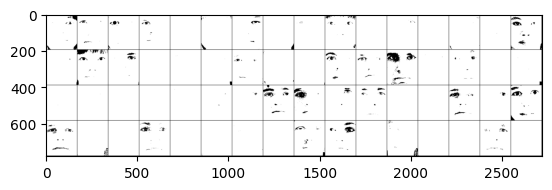

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
input = train_dataset[0][0].reshape(1, 1, 192, 168)
# 觀察 network 輸出結果
out = net(input.to(device))
print(out.to("cpu").detach().numpy().shape)
print(out.data)
print(out.data.max(1, keepdim=True)[1])
print(out.to("cpu").detach().numpy())
 
# get some random training images
dataiter = iter(train_loader) # an iterable object
images, labels = next(dataiter) # get the next batch
print(images.shape)
 
# show a grid of images
montage = torchvision.utils.make_grid(images, nrow=16) # make a grid of images with 16 images per row
plt.imshow(np.transpose(montage, (1, 2, 0)), cmap='gray')
plt.show()

<hr>

#### 損失函數

- **Cross Entropy Loss (`nn.CrossEntropyLoss`)**：
  - 這是一種常用於多類別分類問題的損失函數。
  - 它結合了 `nn.LogSoftmax()` 和 `nn.NLLLoss()` 兩個操作，能夠在計算過程中提高數值穩定性。

#### 優化器

- **Adam Optimizer (`torch.optim.Adam`)**：
  - `Adam` 是一種基於自適應估計的方法，常用於深度學習應用中。
  - 它結合了 `AdaGrad` 和 `RMSProp` 兩種優化技術的優點。
  - 在這個例子中，學習率 (`lr`) 被設置為 `0.001`，這是一個常用的學習率值，適合多數情況。

#### 優化器的注釋替代選擇

- **SGD Optimizer (`torch.optim.SGD`)**：
  - 被注釋掉的這部分代碼提供了另一種優化器的選擇。
  - `SGD` 是隨機梯度下降法，這是最基本的優化策略。
  - 設置了學習率 (`lr=0.001`)、動量 (`momentum=0.9`) 和權重衰減 (`weight_decay=1e-4`)，這有助於加快收斂速度並提高模型性能。

In [21]:
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9,weight_decay=1e-4)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

### <h3 style="color: yellow;"> 訓練流程概述

- **迭代次數**：模型將被訓練50個 epochs，每個 epoch 都會完整遍歷一次訓練數據集。
- **批次處理**：每次從 `train_loader` 中獲取一批數據，包括輸入的圖像和對應的標籤。

#### 每個批次的處理步驟

1. **輸入準備**：
   - 將數據和標籤載入至設備（如GPU）。

2. **梯度清零**：
   - 在進行反向傳播前，清空過去的梯度。

3. **前向傳播**：
   - 將輸入通過網絡獲得輸出。

4. **損失計算**：
   - 使用 `criterion` 計算預測輸出與真實標籤之間的損失。

5. **反向傳播**：
   - 基於損失計算梯度。

6. **參數更新**：
   - 用 `optimizer` 根據計算的梯度更新網絡參數。

7. **統計信息打印**：
   - 每200個 mini-batches 打印一次當前的損失。

#### 訓練結果記錄

- **損失記錄**：
  - 將每個 epoch 的平均損失記錄下來。
  
- **準確度記錄**：
  - 計算並記錄每個 epoch 的訓練準確度。

In [22]:
# 假設已經定義了 model, train_loader, criterion, optimizer, device

epochs = 50
training_losses = []
training_accuracies = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)  # move to GPU if available

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)  # forward pass
        loss = criterion(outputs, labels)  # compute loss
        loss.backward()  # compute gradients
        optimizer.step()  # update weights

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            print(f'[Epoch: {epoch + 1}, Batch: {i + 1:5d}] Loss: {running_loss / 200:.3f}')
            running_loss = 0.0

    # Record the training loss and accuracy for each epoch
    training_losses.append(running_loss / len(train_loader))
    training_accuracies.append(100 * correct / total)

print('Finished Training')



Finished Training


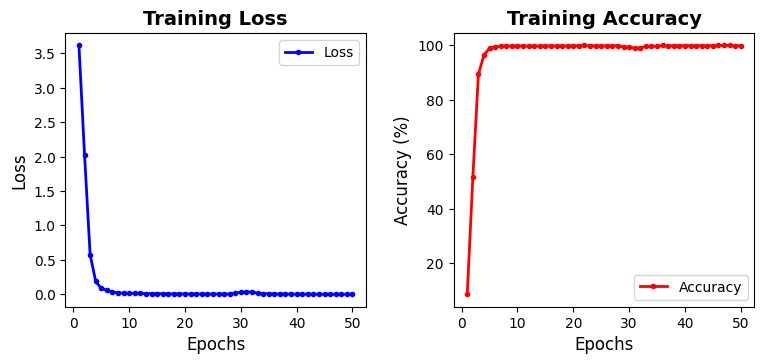

In [23]:
import matplotlib.pyplot as plt

# 創建一個圖形窗口
plt.figure(figsize=(8, 4))  # 調整圖形尺寸，使其更大更清晰

# 繪製訓練損失圖
plt.subplot(1, 2, 1)  # 1行2列的第一個
plt.plot(range(1, epochs+1), training_losses, marker='o', linestyle='-', color='blue', markersize=3, linewidth=2, label='Loss')
plt.title('Training Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right')  # 添加圖例

# 繪製訓練準確度圖
plt.subplot(1, 2, 2)  # 1行2列的第二個
plt.plot(range(1, epochs+1), training_accuracies, marker='o', linestyle='-', color='red', markersize=3, linewidth=2, label='Accuracy')
plt.title('Training Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='lower right')  # 添加圖例

# 調整整體布局
plt.tight_layout(pad=2.0)  # pad 參數增加內邊距，避免標籤相互覆蓋

# 顯示圖表
plt.show()

### <h3 style="color: yellow;"> 訓練損失圖分析

- **持續下降的損失值**：顯示模型正在有效學習，誤差逐漸減小。
- **平滑的下降曲線**：指示學習過程穩定，無大幅波動，表示學習率和其他超參數設定適當。

### <h3 style="color: yellow;"> 訓練準確度分析

- **逐步提升的準確度**：理想的準確度曲線應隨著訓練進度逐漸提高，表明模型正逐漸適應訓練數據。
- **進入穩定階段**：訓練後期，準確度變化幅度應減少，趨於穩定，表示模型已近乎收斂。

<hr>

### <h3 style="color: yellow;"> 保存模型方便後續模型使用並讀入模型

In [24]:
PATH = './modelCNN.pth' # .pth will collide with the PyTorch JIT
torch.save(net.state_dict(), PATH)

In [25]:
import torch
model = Net().to(device)
pretrained_dict = torch.load(r'D:/shallow_ml//modelCNN.pth')  #讀入 .pth
model.load_state_dict(pretrained_dict)
model.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bc1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bc2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=38, bias=True)
)

### <h3 style="color: yellow;"> 測試流程步驟

1. **禁用梯度計算**：
   - 使用 `torch.no_grad()` 確保在進行預測時不計算梯度，這有助於減少記憶體消耗並提高計算速度。

2. **數據加載**：
   - 從 `test_loader` 中遍歷測試數據集。每次迭代提取一批圖像和相應的標籤。

3. **模型預測**：
   - 將圖像輸入到網絡 `net` 中，計算其輸出。輸出通常是每個類別的原始分數或能量。

4. **結果解釋**：
   - 使用 `torch.max()` 函數從輸出中選取具有最高能量（分數）的類別作為預測結果。

5. **統計計算**：
   - 計算總樣本數和正確預測的數量，用於後續計算模型的準確率。

In [26]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
print(f'Accuracy of the network on the  test images: {100 * correct // total} %')

Accuracy of the network on the  test images: 98 %


### <h3 style="color: yellow;"> 預期結果

- 通過比較預測結果與真實標籤，可以評估模型在新數據上的泛化能力。
- 結果可以用於計算如準確率等性能指標，這些指標有助於衡量模型在實際應用場景中的有效性。

 <hr>

 ### <h3 style="color: yellow;"> 圖像的視覺化與預測

- **圖像選擇**：
  - 從 `test_loader` 中遍歷並隨機選取 38 張測試圖像。

- **模型預測**：
  - 對每張圖像進行前向推導，以獲得模型的預測輸出。
  - 使用 `torch.max` 從模型輸出中獲得預測標籤。

- **圖像顯示**：
  - 圖像數據從張量轉換為 NumPy 陣列並以灰階格式顯示。
  - 每個子圖上顯示的標題包括真實標籤和模型預測的標籤。
  
- **視覺輸出**：
  - 用戶將看到一個包含多個圖像的面板，每張圖像下方都會顯示實際和預測的標籤。
  - 這有助於直觀地評估模型對於未見數據的識別能力。

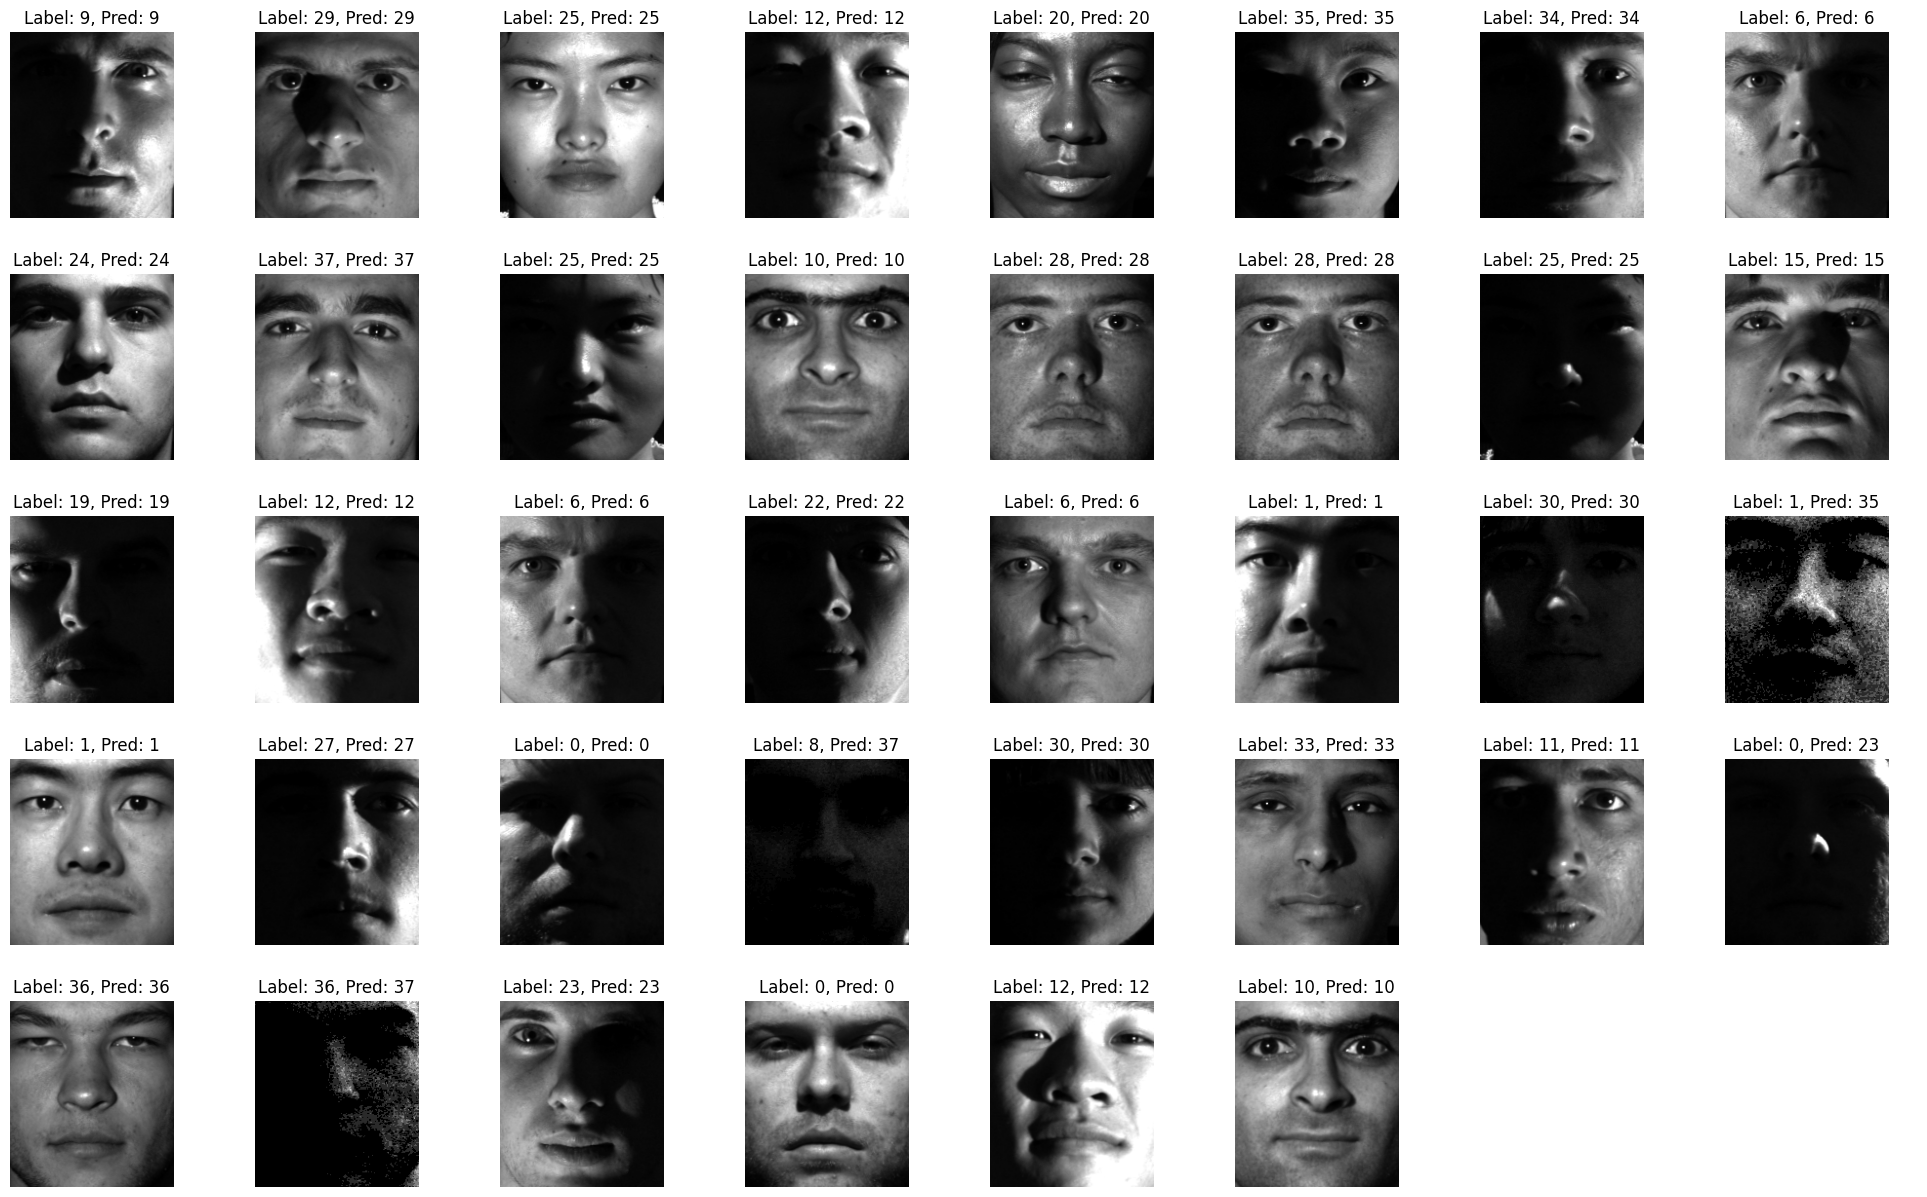

In [27]:
# Setup the plot
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(25, 15))  # Adjust the size as needed
axes = axes.flatten()

# Set number of images to display
num_images = 38
# Disable gradient calculation
with torch.no_grad():
    for i in range(num_images):
        images, labels = next(iter(test_loader))
        index = np.random.randint(len(images))
        image = images[index]
        label = labels[index]

        # Calculate output
        output = model(image.unsqueeze(0).to(device))
        _, predicted_label = torch.max(output, 1)

        # Prepare image for display
        image_np = image.squeeze().numpy()
        axes[i].imshow(image_np, cmap='gray')
        axes[i].set_title(f"Label: {label.item()}, Pred: {predicted_label.item()}")
        axes[i].axis('off')

    # Hide the last two axes which are not used
    for j in range(num_images, 40):
        axes[j].axis('off')

# Adjust subplot parameters for better display
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

### <h3 style="color: yellow;"> 結語
透過對網絡結構的精心設計和參數調優，本作品的模型在測試集上達到了令人滿意的準確率，展示了模型對於不同人臉特徵的良好辨識能力。這不僅證實了深度學習在視覺識別任務中的有效性，也突顯了設計的網絡在捕捉和分析臉部細節上的強大能力。

此外，實驗結果也顯示，即使在面對一些因光線或表情變化造成的影像變異時，系統依然能保持穩定的識別效果。這次成功的實驗為未來在更廣泛的真實世界應用中部署類似技術奠定了堅實的基礎。

我們也可進一步的優化和調整仍有其必要性，例如加入更多的數據擴充技術或探索更深層的網絡架構可能會進一步提升模型的泛化能力和準確率。未來工作將聚焦於這些方面，以期達到更高標準的實用性和效能。